Author: Shiyue Cao

USCID: 8583755038

Email: shiyuec@usc.edu

# (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [4]:
import csv
import pandas as pd
import numpy as np
import os
import shutil

if os.path.exists("./merged_data"):
    shutil.rmtree("./merged_data")
os.mkdir("./merged_data")

folders = os.listdir("./raw_data")
for folder in folders:
    i = 0
    if folder.startswith("bending"):
        merge_index = 2
    else:
        merge_index = 3
    for f in os.listdir("./raw_data/"+folder):
        data = pd.read_csv("./raw_data/" + folder + "/" + f,
                           skiprows=5, header=None)

        if i < merge_index:
            outputfile = "./merged_data/" + folder+"_test.csv"
        else:
            outputfile = "./merged_data/" + folder+"_train.csv"
        data.to_csv(outputfile, mode='a', index=False, header=False)
        i += 1

There are 9568 rows and 5 columns.

Each row is a data point, each column is a feature. The last column is expected to be predict.

Columns include Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V) and energy output (PE).

# (c) Feature Extraction
## i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).


Time-domain feature including mean, standard deviation, maximum, minimum, skewness, kurtosis and quartiles.



## (ii)Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [5]:
def ext_feature(path, piece, skiprows):

    folders = os.listdir(path)
    feature = np.zeros([88, (42*piece + 2)])
    col = []
    for i in range(0, 6*piece):
        col.append("max"+str(i+1))
        col.append("min"+str(i+1))
        col.append("mean"+str(i+1))
        col.append("std"+str(i+1))
        col.append("1st quart"+str(i+1))
        col.append("median"+str(i+1))
        col.append("3rd quart"+str(i+1))
    col.append("train_test")
    col.append("activities")

    i = 0
    p = 0
    for folder in folders:
        j = 0
        if folder.startswith("bending"):
            merge_index = 2
        else:
            merge_index = 3
        for f in os.listdir(path + "/"+folder):
            data = pd.read_csv(path + "/" + folder + "/" + f,
                               skiprows=skiprows, header=None)
            m = 0
            for k in range(0, 6*piece):
                if k % 6 == 0:
                    m += 1
                feature[i, k*7] = data.max()[k+m]
                feature[i, k*7+1] = data.min()[k+m]
                feature[i, k*7+2] = data.mean()[k+m]
                feature[i, k*7+3] = data.std()[k+m]
                feature[i, k*7+4] = data.quantile(.25)[k+m]
                feature[i, k*7+5] = data.median()[k+m]
                feature[i, k*7+6] = data.quantile(.75)[k+m]
            if j < merge_index:  # train data or test data
                feature[i, -2] = 0  # test
            else:
                feature[i, -2] = 1  # train
            feature[i, -1] = p  # activeties index
            i += 1
            j += 1
        p += 1
    feature = np.around(feature, 3)
    df = pd.DataFrame(feature, columns=col)
    return df


In [6]:

path = "./raw_data"
feature = ext_feature(path, 1, 5)
feature.to_csv("./src/feature.csv", index=False)


table=feature.iloc[:10,:] #show 10 rows
table

,max1,min1,mean1,std1,1st quart1,median1,3rd quart1,max2,min2,mean2,...,3rd quart5,max6,min6,mean6,std6,1st quart6,median6,3rd quart6,train_test,activities
0,45.00,37.25,40.625,1.477,39.250,40.50,42.00,1.30,0.0,0.359,...,36.00,1.92,0.0,0.571,0.583,0.00,0.43,1.30,0.0,0.0
1,45.67,38.00,42.813,1.436,42.000,42.50,43.67,1.22,0.0,0.372,...,34.50,3.11,0.0,0.571,0.601,0.00,0.43,1.30,0.0,0.0
2,47.40,35.00,43.954,1.559,43.000,44.33,45.00,1.70,0.0,0.426,...,36.50,1.79,0.0,0.493,0.514,0.00,0.43,0.94,1.0,0.0
3,47.75,33.00,42.180,3.671,39.150,43.50,45.00,3.00,0.0,0.696,...,36.33,2.18,0.0,0.614,0.524,0.00,0.50,1.00,1.0,0.0
4,45.75,33.00,41.678,2.243,41.330,41.75,42.75,2.83,0.0,0.536,...,31.25,1.79,0.0,0.383,0.389,0.00,0.43,0.50,1.0,0.0
5,48.00,37.00,43.455,1.386,42.500,43.25,45.00,1.58,0.0,0.378,...,24.00,5.26,0.0,0.680,0.623,0.43,0.50,0.87,1.0,0.0
6,48.00,36.25,43.969,1.618,43.310,44.50,44.67,1.50,0.0,0.413,...,23.75,2.96,0.0,0.555,0.488,0.00,0.49,0.83,1.0,0.0
7,51.00,12.75,24.563,3.738,23.188,24.25,26.50,6.87,0.0,0.591,...,27.00,4.97,0.0,0.700,0.694,0.43,0.50,0.87,0.0,1.0
8,42.75,0.00,27.465,3.584,25.500,28.00,30.00,7.76,0.0,0.450,...,20.75,6.76,0.0,1.122,1.012,0.47,0.83,1.30,0.0,1.0
9,50.00,21.00,32.586,6.238,26.188,33.00,34.50,9.90,0.0,0.516,...,23.50,13.61,0.0,1.162,1.333,0.47,0.83,1.30,1.0,1.0


The extracted features has been saved in feature.csv

Totally 88 rows, Here show first 10 rows.

## (iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python's bootstrapped or any other method to build a 90% bootsrap condence interval for the standard deviation of each feature.

In [7]:
import heapq as hp
data = pd.read_csv("./src/feature.csv")

CI = []
for i in data.columns:
    samples = []
    for j in range(100):
        data_sample = data[i].sample(n=10, replace=True)
        sample_std = data_sample.std()
        hp.heappush(samples, sample_std)
    lower = np.around(hp.nsmallest(5, samples), 2)[4]
    higher = np.around(hp.nlargest(5, samples), 2)[4]
    CI.append([lower, higher])


table = pd.DataFrame({
    "STD": data.std()[:-2],
    "CI": CI[:-2]})
table


,STD,CI
max1,4.394362,"[1.96, 7.26]"
min1,9.569975,"[6.43, 13.44]"
mean1,5.335760,"[3.36, 7.13]"
std1,1.772188,"[1.12, 2.47]"
1st quart1,6.153581,"[4.3, 7.82]"
median1,5.440054,"[3.44, 7.4]"
3rd quart1,5.138946,"[2.59, 7.52]"
max2,5.062729,"[2.83, 6.29]"
min2,0.000000,"[0.0, 0.0]"
mean2,1.574183,"[0.83, 1.97]"


## (iv) Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

I choose max, mean and std as three important features

 # (d) Binary Classification Using Logistic Regression


## (i) Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classication problem. Depict scatter plots of the features you specied in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

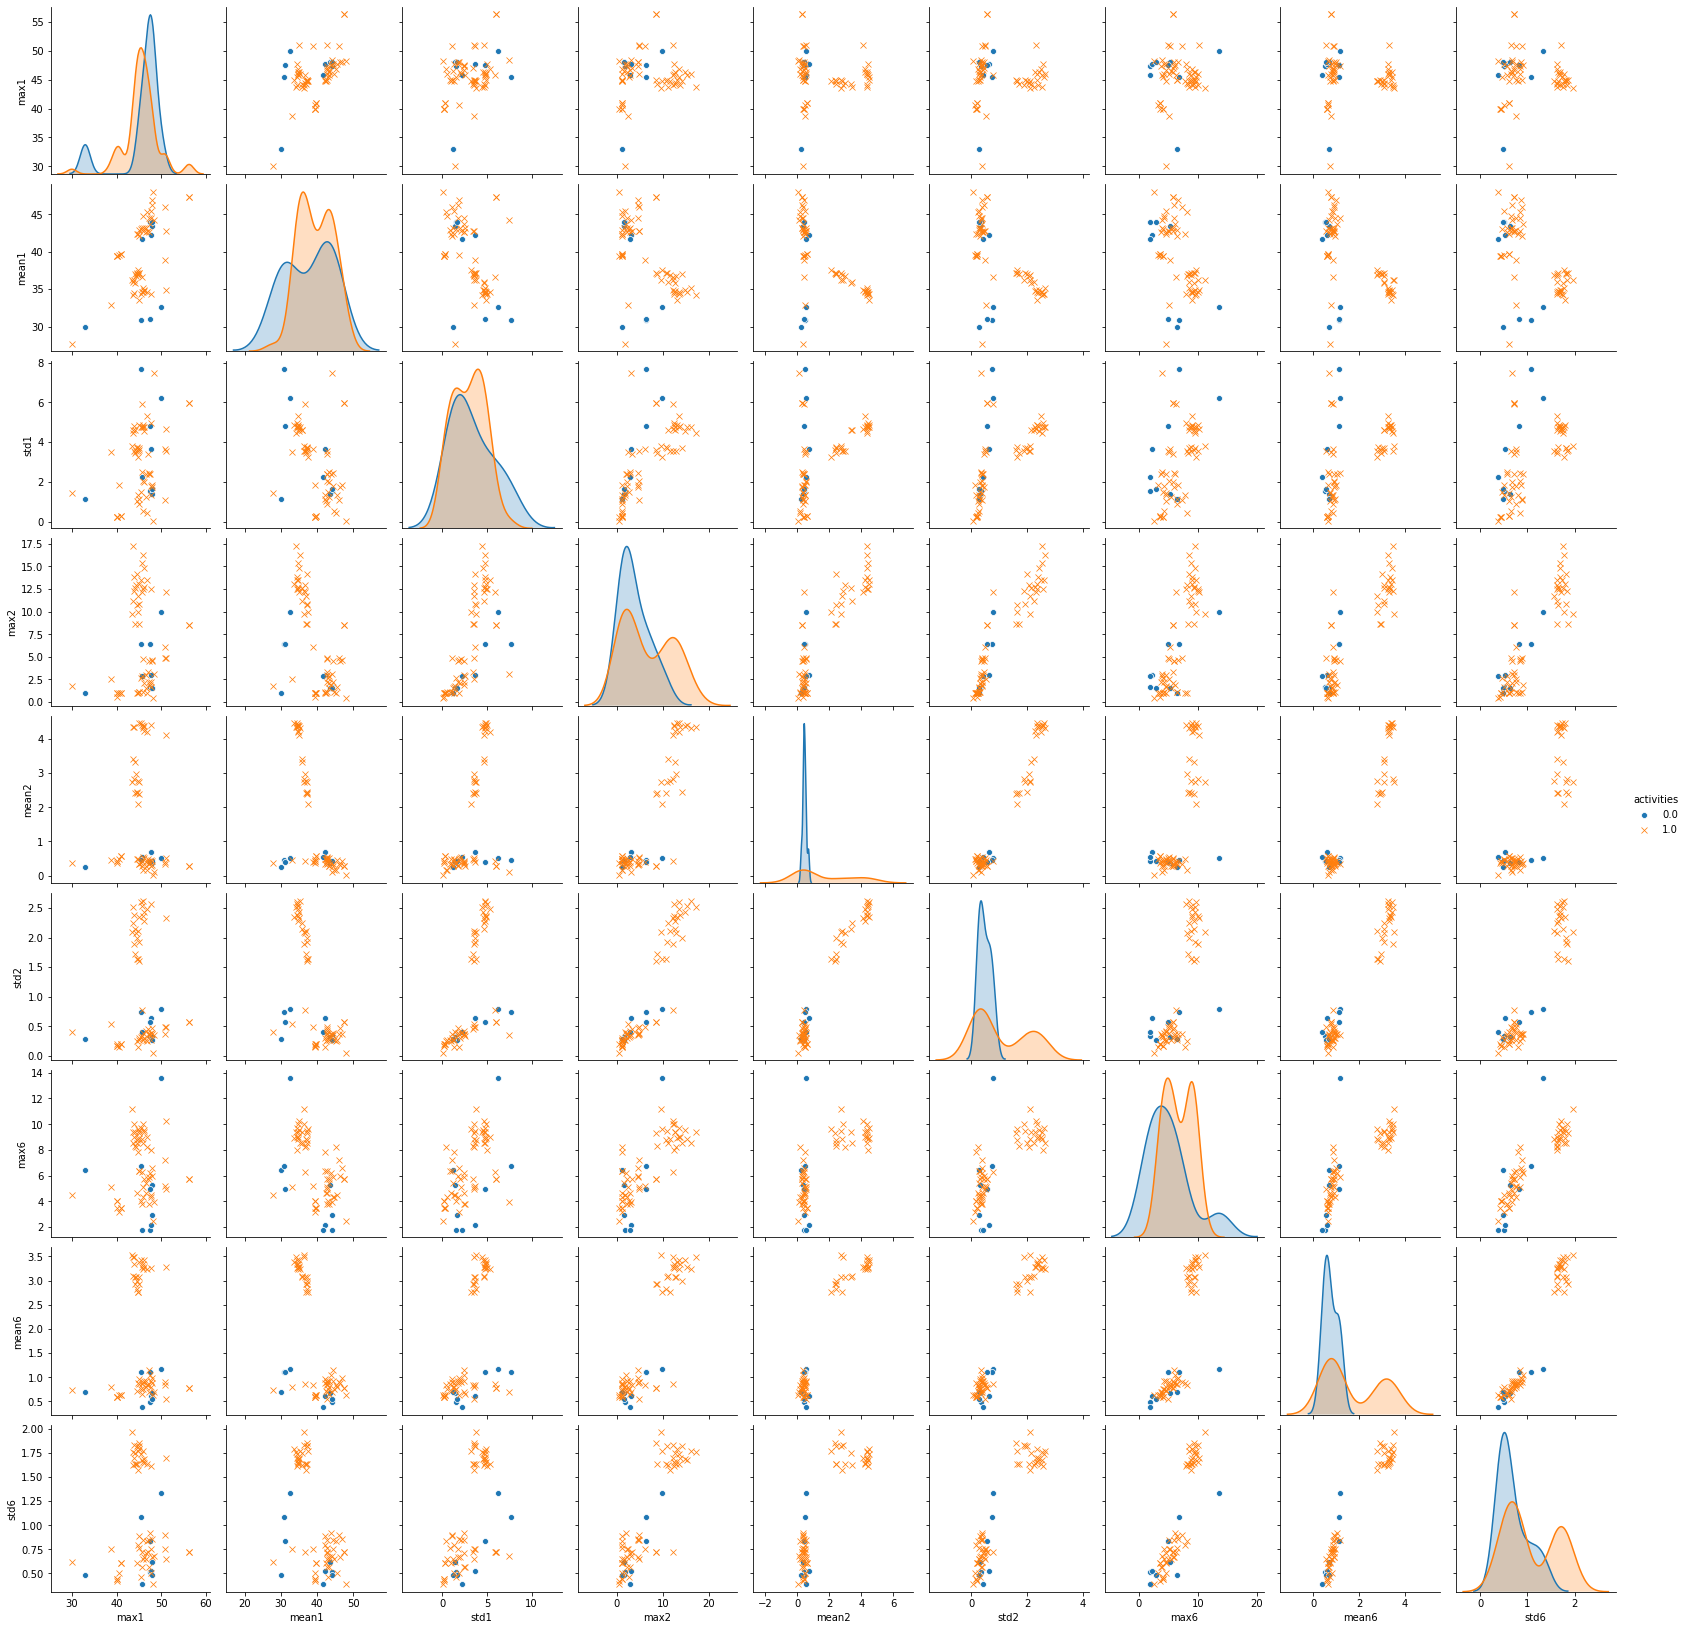

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("./src/feature.csv")
train_data = data.loc[data['train_test'] == 1]
train_data.loc[(train_data['activities']
                == 0) | (train_data['activities'] == 1), 'activities'] = 0
train_data.loc[(train_data['activities']
                != 0) & (train_data['activities'] != 1), 'activities'] = 1

features = ['max1', 'mean1', 'std1', 'max2',
            'mean2', 'std2', 'max6', 'mean6', 'std6', 'activities']
sns.pairplot(train_data[features], hue="activities", markers=["o", "x"])
plt.show()


## (ii) Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i?

In [9]:
def brk_ext(piece):

    if os.path.exists("./breaking_data"):
        shutil.rmtree("./breaking_data")
    os.mkdir("./breaking_data")
    folders = os.listdir("./raw_data")
    feature = np.zeros([88, (42*piece + 2)])
    col = []
    for i in range(0, 6*piece):
        col.append("max"+str(i+1))
        col.append("min"+str(i+1))
        col.append("mean"+str(i+1))
        col.append("std"+str(i+1))
        col.append("1st quart"+str(i+1))
        col.append("median"+str(i+1))
        col.append("3rd quart"+str(i+1))
    col.append("train_test")
    col.append("activities")

    i = 0
    q = 0
    for folder in folders:
        n = 0
        if folder.startswith("bending"):
            merge_index = 2
        else:
            merge_index = 3
        for f in os.listdir("./raw_data/"+folder):
            data = pd.read_csv("./raw_data/" + folder + "/" + f,
                               skiprows=5, header=None)

            new_data = pd.DataFrame()
            for j in range(0, int(480/piece)*piece, int(480/piece)):

                if not os.path.exists("./breaking_data/"+folder):
                    os.mkdir("./breaking_data/"+folder)
                p = pd.DataFrame(
                    data[j:j+int(480/piece)]).reset_index(drop=True)
                new_data = pd.concat(
                    [new_data, p], axis=1)
            new_data.columns = range(0, 7*piece)
            m = 0
            for k in range(0, 6*piece):
                if k % 6 == 0:
                    m += 1

                feature[i, k*7] = new_data.max()[k+m]
                feature[i, k*7+1] = new_data.min()[k+m]
                feature[i, k*7+2] = new_data.mean()[k+m]
                feature[i, k*7+3] = new_data.std()[k+m]
                feature[i, k*7+4] = new_data.quantile(.25)[k+m]
                feature[i, k*7+5] = new_data.median()[k+m]
                feature[i, k*7+6] = new_data.quantile(.75)[k+m]
            if n < merge_index:  # train data or test data
                feature[i, -2] = 0  # test
            else:
                feature[i, -2] = 1  # train
            feature[i, -1] = q  # activeties index
            n += 1
            i += 1
        q += 1
    feature = np.around(feature, 3)
    df = pd.DataFrame(feature, columns=col)
    return df



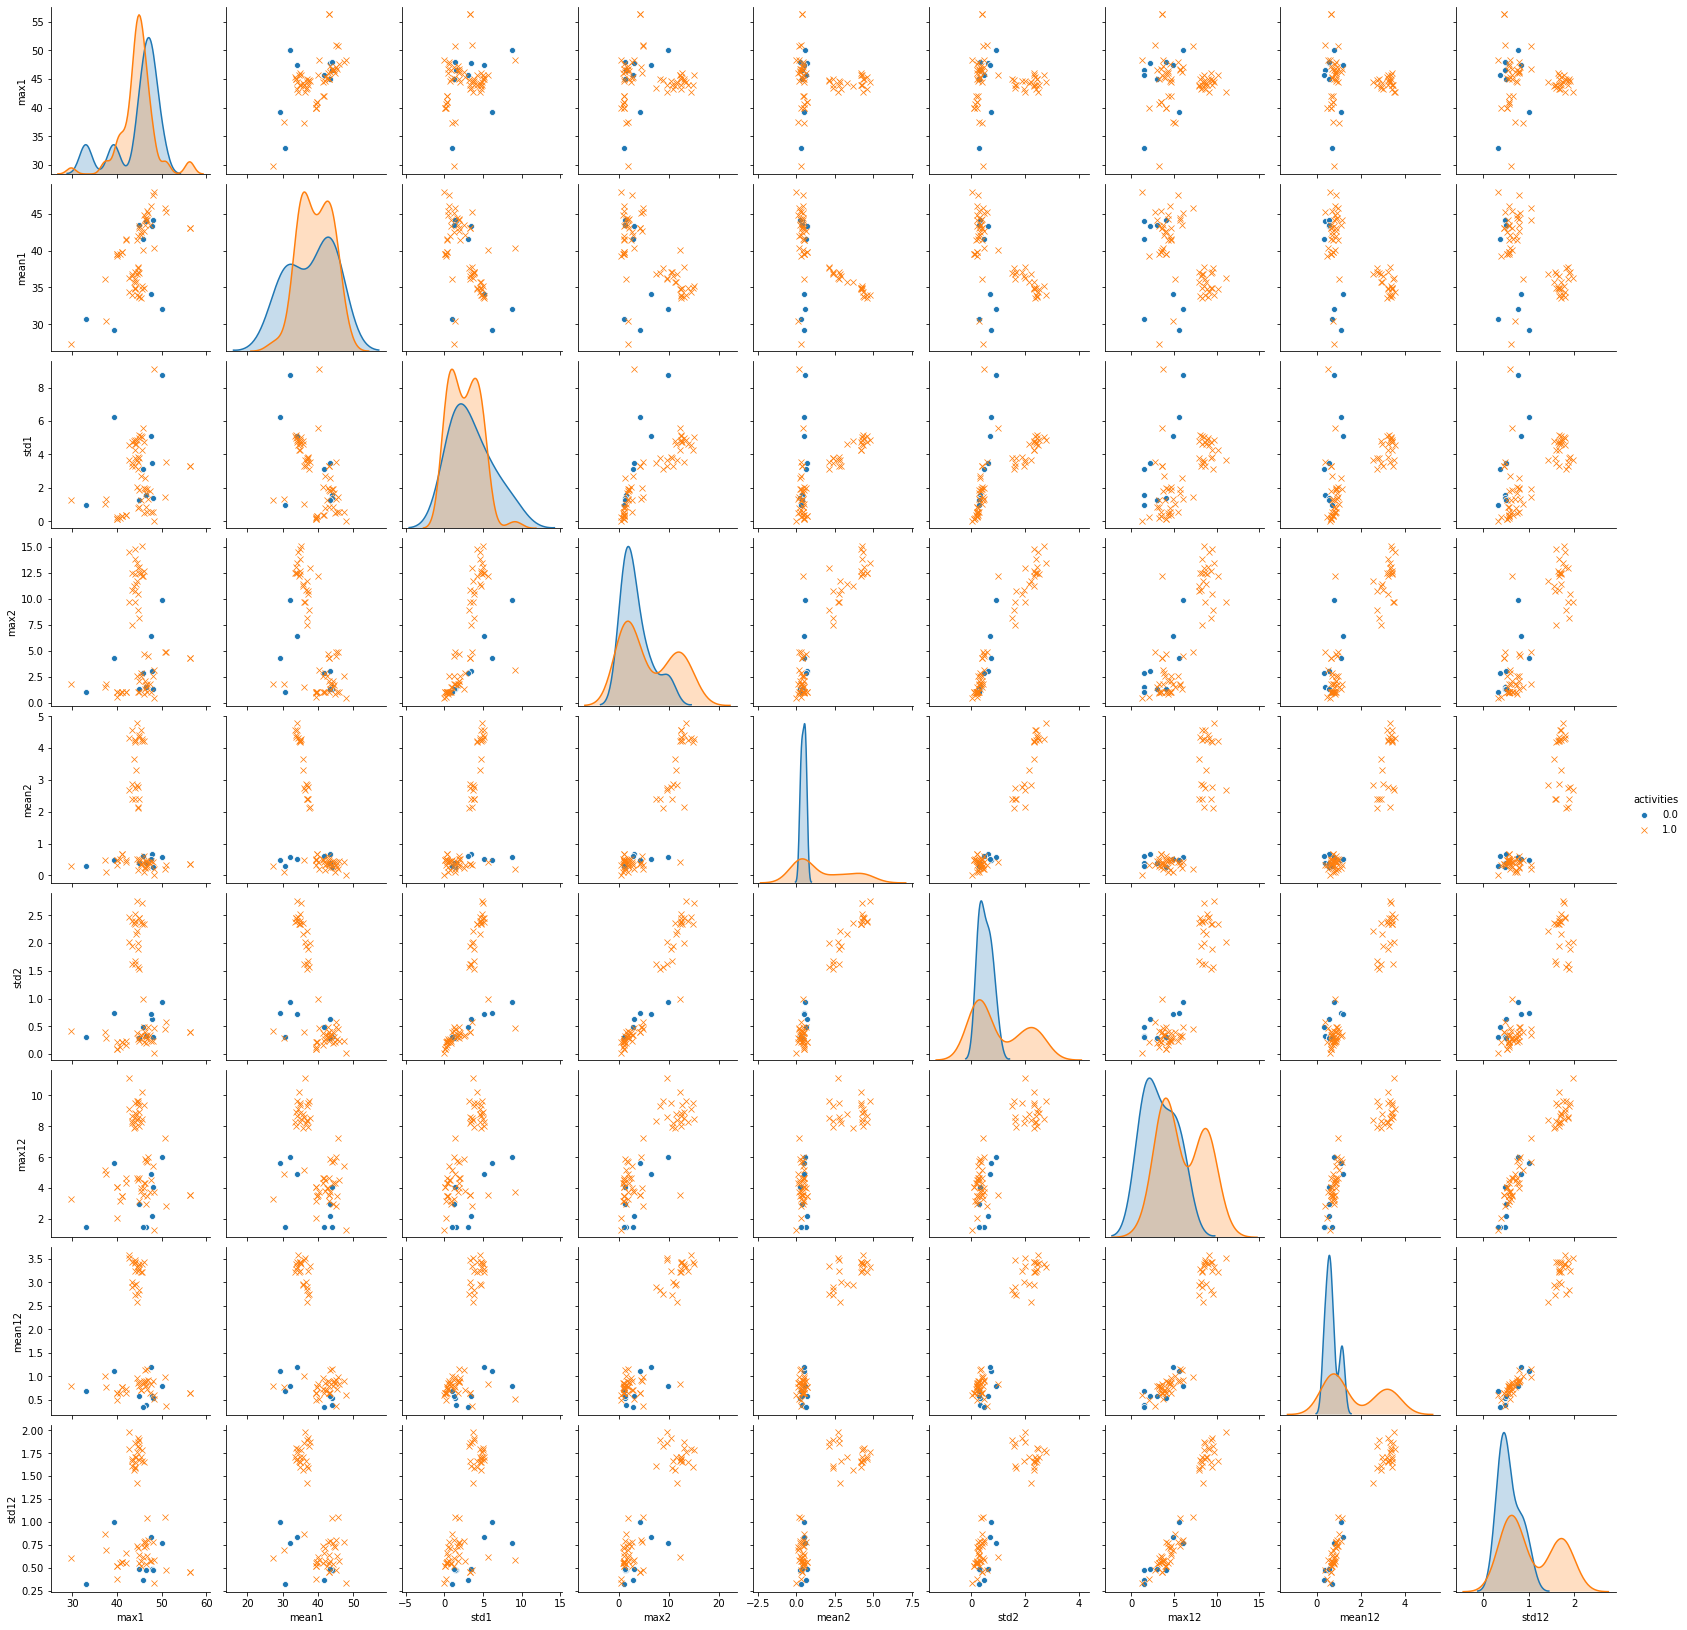

In [10]:
feature = brk_ext(2)
train_data = feature.loc[feature['train_test'] == 1]
train_data.loc[(train_data['activities']
                == 0) | (train_data['activities'] == 1), 'activities'] = 0
train_data.loc[(train_data['activities']
                != 0) & (train_data['activities'] != 1), 'activities'] = 1

features = ['max1', 'mean1', 'std1', 'max2',
            'mean2', 'std2', 'max12', 'mean12', 'std12', 'activities']
sns.pairplot(train_data[features], hue="activities", markers=["o", "x"])
plt.show()



## (iii) Break each time series in your training set into $ l \in {1,2,...,20}$ time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed. In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression

In [11]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE ,RFECV,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc



for piece in range(1, 21):

    feature = brk_ext(piece)
    train_data = feature.loc[feature['train_test'] == 1]
    train_data.loc[(train_data['activities']
                    == 0) | (train_data['activities'] == 1), 'activities'] = 0
    train_data.loc[(train_data['activities']
                    != 0) & (train_data['activities'] != 1), 'activities'] = 1

    col = []
    for i in range(0, 6*piece):
        col.append("max"+str(i+1))
        col.append("mean"+str(i+1))
        col.append("std"+str(i+1))
    train_target = train_data.iloc[:, -1]
    train_data = train_data[col]
    model = LogisticRegression(max_iter=20)
    clf = RFECV(model, step=1, cv=5, n_jobs=-1)
    clf = clf.fit(train_data, train_target)
    row, p = train_data.iloc[:, clf.get_support()].shape
    train_score = clf.score(train_data, train_target)
    f1 = f1_score(train_target, clf.predict(train_data))
    print("piece: ", piece, "p :",
          p, "accuracy: ", train_score, "  F1-score :", f1)



piece:  1 p : 10 accuracy:  1.0   F1-score : 1.0
piece:  2 p : 4 accuracy:  0.9855072463768116   F1-score : 0.9917355371900827
piece:  3 p : 8 accuracy:  1.0   F1-score : 1.0
piece:  4 p : 8 accuracy:  1.0   F1-score : 1.0
piece:  5 p : 1 accuracy:  0.9710144927536232   F1-score : 0.9836065573770492
piece:  6 p : 5 accuracy:  1.0   F1-score : 1.0
piece:  7 p : 5 accuracy:  1.0   F1-score : 1.0
piece:  8 p : 3 accuracy:  1.0   F1-score : 1.0
piece:  9 p : 4 accuracy:  1.0   F1-score : 1.0
piece:  10 p : 18 accuracy:  1.0   F1-score : 1.0
piece:  11 p : 18 accuracy:  1.0   F1-score : 1.0
piece:  12 p : 10 accuracy:  1.0   F1-score : 1.0
piece:  13 p : 14 accuracy:  1.0   F1-score : 1.0
piece:  14 p : 15 accuracy:  1.0   F1-score : 1.0
piece:  15 p : 10 accuracy:  1.0   F1-score : 1.0
piece:  16 p : 29 accuracy:  1.0   F1-score : 1.0
piece:  17 p : 149 accuracy:  1.0   F1-score : 1.0
piece:  18 p : 28 accuracy:  1.0   F1-score : 1.0
piece:  19 p : 9 accuracy:  1.0   F1-score : 1.0
piece: 

Condsider both accuracy and complexity, I choose to break to 6 series, then there will be 5 feature selected.

The selected features are:

In [12]:

piece = 6
feature = brk_ext(piece)
train_data = feature.loc[feature['train_test'] == 1]
train_data.loc[(train_data['activities']
                == 0) | (train_data['activities'] == 1), 'activities'] = 0
train_data.loc[(train_data['activities']
                != 0) & (train_data['activities'] != 1), 'activities'] = 1

col = []
for i in range(0, 6*piece):
    col.append("max"+str(i+1))
    col.append("mean"+str(i+1))
    col.append("std"+str(i+1))
train_target = train_data.iloc[:, -1]
train_data = train_data[col]

model = LogisticRegression(max_iter=20)
clf = RFECV(model, step=1, cv=5, n_jobs=-1)
clf = clf.fit(train_data, train_target)
pured_data = train_data.iloc[:, clf.support_]
print(pured_data.columns)



Index(['max5', 'mean5', 'max8', 'mean25', 'max36'], dtype='object')


## (iv) Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

confusion matrix
Predicted  0.0  1.0  All
True                    
0.0          9    0    9
1.0          0   60   60
All          9   60   69
parameters
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1984691388674832e-10
            Iterations: 38
            Function evaluations: 44
            Gradient evaluations: 38
max5      -8.793897
mean5    -10.783544
max8       5.935166
mean25     9.413987
max36     13.791729
dtype: float64
P-values
max5 5.6748031355272684e-14
mean5 1.564899601923281e-19
max8 0.003042601732912892
mean25 0.1846140813508423
max36 0.0001536894075795768


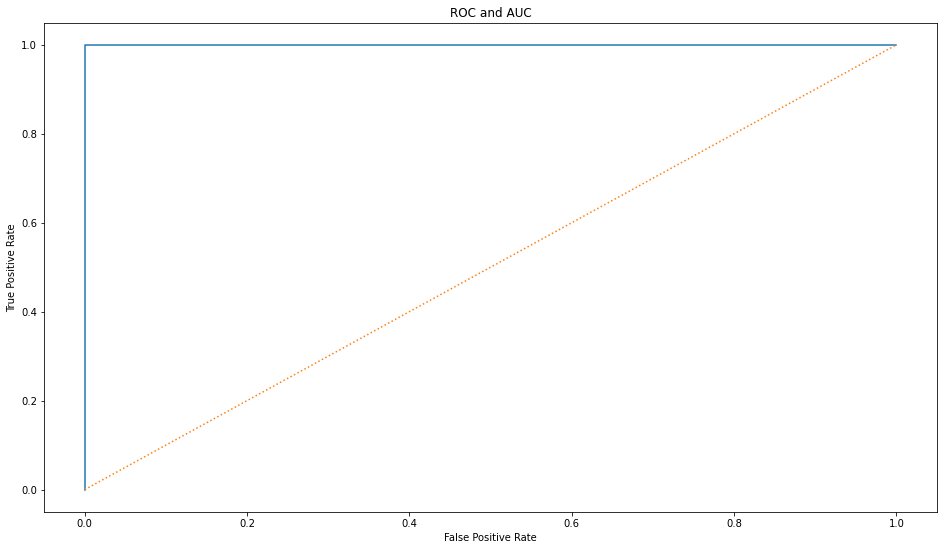

In [13]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE ,RFECV,chi2
piece = 6
feature = brk_ext(piece)

train_data = feature.loc[feature['train_test'] == 1]
train_data.loc[(train_data['activities']
                == 0) | (train_data['activities'] == 1), 'activities'] = 0
train_data.loc[(train_data['activities']
                != 0) & (train_data['activities'] != 1), 'activities'] = 1

col = []
for i in range(0, 6*piece):
    col.append("max"+str(i+1))
    col.append("mean"+str(i+1))
    col.append("std"+str(i+1))
train_target = train_data.iloc[:, -1]
train_data = train_data[col]

model = LogisticRegression(max_iter=20)
clf = RFECV(model, step=1, cv=5, n_jobs=-1)
clf = clf.fit(train_data, train_target)
pured_data = train_data.iloc[:, clf.support_]

model = LogisticRegression(max_iter=20)
clf = RFECV(model, step=1, cv=5, n_jobs=-1)
clf = clf.fit(pured_data, train_target)
pred = clf.predict(pured_data)
falsePositiveRate, truePositiveRate, thresholds = roc_curve(
    train_target, pred)

confu_mat = pd.crosstab(train_target, pred,
                        rownames=['True'], colnames=['Predicted'], margins=True)
print("confusion matrix")
print(confu_mat)
print("parameters")
statLogitModel = sm.Logit(train_target, pured_data).fit_regularized()
print(statLogitModel.params)
print("P-values")
scores, pvalues = chi2(pured_data, train_target)
for i in range(len(pvalues)):
    print(pured_data.columns[i], pvalues[i])
    
plt.figure(figsize=(16, 9))
plt.plot(falsePositiveRate, truePositiveRate)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.show()

## (v) Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the featuresextracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [14]:
test_data = feature.loc[feature['train_test'] == 0]
test_data.loc[(test_data['activities']
               == 0) | (test_data['activities'] == 1), 'activities'] = 0
test_data.loc[(test_data['activities']
               != 0) & (test_data['activities'] != 1), 'activities'] = 1
test_target = test_data.iloc[:, -1]
test_data = test_data[pured_data.columns]
accuracy = clf.score(test_data, test_target)

print("accuracy: %.2f" % accuracy)


accuracy: 1.00
